In [24]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [30]:
NUM_SAMPLES = 200
MU_1 = 0
MU_2 = 1

TS = np.concatenate(( np.random.normal(MU_1,1,(1,NUM_SAMPLES)), np.random.normal(MU_2,1,(1,NUM_SAMPLES))),axis=1 )
TS = TS[0]

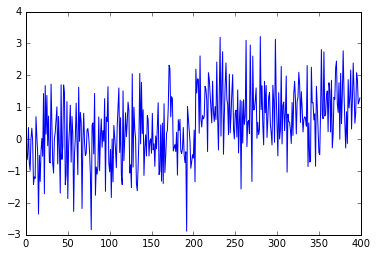

In [31]:
plt.plot(TS)